In [1]:
import numpy as np 
import cv2, urllib, os
import pandas as pd 

In [2]:
llf = pd.read_csv("llfeat_temuco.csv")
hlf = pd.read_csv("hlfeat_temuco.csv")

In [3]:
hlf['lat'], hlf['lon'] = hlf['latlong'].str.split(',', 1).str
hlf = hlf.sort_values(["latlong"])
llf = llf.sort_values(["latlong"])
hlf = hlf.drop("latlong", axis = 1)

In [4]:
df = pd.concat([llf, hlf], axis = 1, join = "inner")
df = df.set_index("latlong")

In [5]:
df["outlier_bn"] = 0
df["outlier_hs"] = 0
df["outlier_hlf"] = 0

for c in df.columns:
    if c == "mean_bn" or c == "stdev_bn":
        df.loc[np.abs(df[c]-df[c].mean()) > (3*df[c].std()), "outlier_bn"] += 1
    elif c.endswith("_s") or c.endswith("_h"):
        df.loc[np.abs(df[c]-df[c].mean()) > (3*df[c].std()), "outlier_hs"] += 1
    elif c.endswith("_S") or c.endswith("_N"):
        df.loc[np.abs(df[c]-df[c].mean()) > (6*df[c].std()), "outlier_hlf"] += 1

In [6]:
df = df[df["outlier_bn"] == 0]
df = df[df["outlier_hs"] == 0]
df = df[df["outlier_hlf"] <= 1]
df = df.drop(["mean_bn", "stdev_bn", "outlier_bn", "outlier_hs", "outlier_hlf"], axis = 1)
print(len(df))

16552


In [7]:
df2 = pd.DataFrame(index = df.index)

parametros = pd.read_csv("parametros.csv")
parametros = parametros.set_index("Parametro")

In [8]:
atributos_cuali = ["beautiful", "boring", "depressing", "lively", "safe", "wealthy"]

for a in atributos_cuali:
    df2[a] = 0
    
for atri in atributos_cuali:
    for col in df.columns:
        if col.endswith("_N") or col.endswith("_S"):
            df2[atri] += parametros.at[col, atri] * np.log(df[col] * 100 + 1)
        elif col == "lat" or col == "lon":
            holacomoestas = 1
        else:
            df2[atri] += parametros.at[col, atri] * df[col]

In [9]:
df2

,beautiful,boring,depressing,lively,safe,wealthy
latlong,,,,,,
"-38.697697,-72.53198748",2.256538,-0.233207,-1.963740,0.917483,2.019426,1.849554
"-38.697697,-72.53261330666666",1.647777,0.026098,-1.467672,0.668114,1.725533,1.397705
"-38.697697,-72.53323913333332",2.214670,-0.130992,-1.956930,1.088459,2.343534,2.089399
"-38.697697,-72.54387818666666",1.972562,-0.245654,-1.778954,1.015058,2.043895,1.786521
"-38.697697,-72.54450401333332",1.589046,-0.484279,-1.676485,1.369265,2.055559,1.809415
"-38.697697,-72.54763314666666",2.816712,-0.972082,-2.635650,1.733101,2.474194,2.435062
"-38.697697,-72.54825897333333",1.999418,-0.410181,-1.933616,1.351178,2.282551,2.065528
"-38.697697,-72.59206684",2.614804,-1.236792,-2.570462,1.965458,2.435349,2.332763
"-38.697697,-72.59269266666666",2.646974,-0.719795,-2.418007,1.507334,2.386910,2.279679


In [18]:
normalized_df=(df2-df2.mean())
normalized_df

,beautiful,boring,depressing,lively,safe,wealthy
latlong,,,,,,
"-38.697697,-72.53198748",0.445180,0.289217,-0.149913,-0.445436,-0.039854,-0.002562
"-38.697697,-72.53261330666666",-0.163581,0.548523,0.346155,-0.694804,-0.333746,-0.454411
"-38.697697,-72.53323913333332",0.403311,0.391432,-0.143103,-0.274460,0.284255,0.237283
"-38.697697,-72.54387818666666",0.161203,0.276770,0.034872,-0.347860,-0.015384,-0.065595
"-38.697697,-72.54450401333332",-0.222312,0.038146,0.137342,0.006346,-0.003721,-0.042701
"-38.697697,-72.54763314666666",1.005353,-0.449657,-0.821824,0.370182,0.414915,0.582946
"-38.697697,-72.54825897333333",0.188060,0.112243,-0.119790,-0.011741,0.223272,0.213413
"-38.697697,-72.59206684",0.803445,-0.714368,-0.756635,0.602539,0.376069,0.480647
"-38.697697,-72.59269266666666",0.835615,-0.197371,-0.604180,0.144415,0.327631,0.427563


In [19]:
df3 = normalized_df.reset_index()
df3['lat'], df3['lon'] = df3['latlong'].str.split(',', 1).str
df3 = df3.set_index("latlong")

In [20]:
df3.to_csv("vars_perceptuales.csv")

/Users/tomasrossettiyoulton/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118fb6a58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e52a4e0>]], dtype=object)

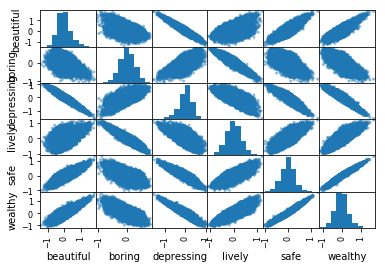

In [23]:
%matplotlib inline

pd.scatter_matrix(df3)

In [10]:
df2.to_csv("vars_perceptuales_nonorm.csv")